In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
iris = pd.read_csv("d:/Dane/iris_data.csv")

In [3]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
le = LabelEncoder()
le.fit(iris["Class"].unique().tolist())

LabelEncoder()

In [23]:
iris2 = iris.copy()
iris2["Class_cat"] = le.transform(iris2["Class"])
iris2 = iris2.drop("Class", axis = 1)

In [24]:
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class_cat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
X = iris2.copy()
X = X.drop("Class_cat", axis = 1)
y = iris2["Class_cat"]
labels = y.unique().tolist()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
def train_test_model(model, X_train, X_test, y_train, y_test, labels):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)    
    acc = accuracy_score(y_test, y_predict, normalize=False) / len(y_test)
    f1 = f1_score(y_test, y_predict, average=None)
    cm = confusion_matrix(y_test, y_predict, labels = labels)
    return (acc , f1, cm)

In [86]:
def train_test_and_display_measures(model, X_train, X_test, y_train, y_test, labels):
    res = train_test_model(model, X_train, X_test, y_train, y_test, labels)
    print(res)
    disp = ConfusionMatrixDisplay(confusion_matrix=res[2], display_labels=model.classes_)
    disp.plot()
    plt.show()

In [87]:
model_svm = svm.SVC()

(0.96, array([1.        , 0.94117647, 0.92857143]), array([[19,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 13]], dtype=int64))


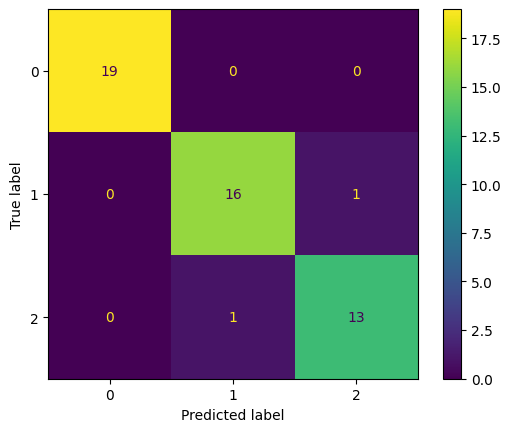

In [88]:
train_test_and_display_measures(model_svm, X_train, X_test, y_train, y_test, labels)

In [89]:
model_rfc = RandomForestClassifier(max_depth=2, random_state=0)

(0.98, array([1.        , 0.97142857, 0.96296296]), array([[19,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64))


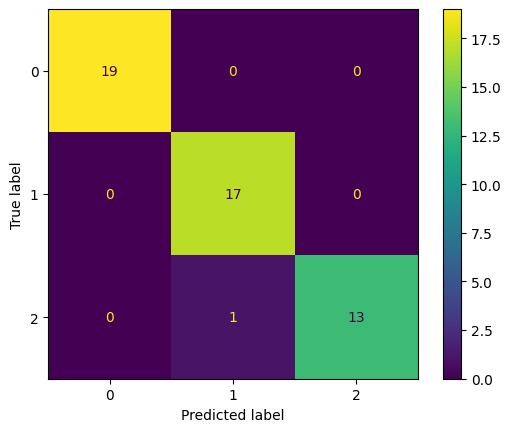

In [90]:
train_test_and_display_measures(model_rfc, X_train, X_test, y_train, y_test, labels)

In [91]:
model_knn = KNeighborsClassifier(n_neighbors = 5)

(0.96, array([1.        , 0.94117647, 0.92857143]), array([[19,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 13]], dtype=int64))


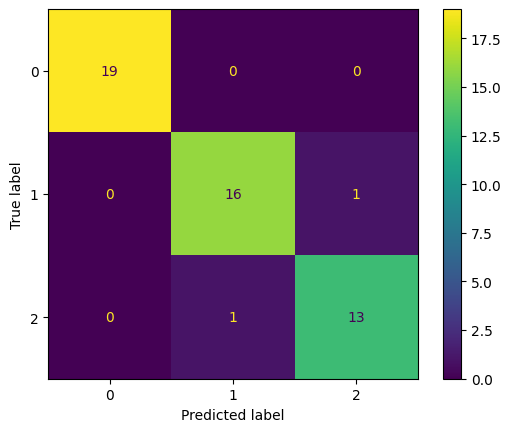

In [92]:
train_test_and_display_measures(model_knn, X_train, X_test, y_train, y_test, labels)